In [2]:
# automatically reload when making changes in module files (only needs to be run once)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# imports
import numpy as np
import copy

import plotly.offline as py

from fracture_fea_laf import mesh, plot

# from vecmaths import geometry
# from abaqus_parse import mesh, fracture, writers, utils, steps
# from abaqus_parse.materials.euromat_A import get_euromat_A_material_definition, get_euromat_A_material_props 


# Intro

Figure 1 shows two mesh designs for the focused mesh near the crack tip. The fan mesh design, shown in Figure 1(a), was developed for the global approaches to cleavage fracture, where the element thickness ahead of the crack front increases with the thickness of the first element set to between two and three times the crack tip radius. In the other approach, shown in Figure 1 (b), there is a small fan mesh very near the crack tip, which transitions to a uniform mesh with a constant size element. The local approaches have been found to be more sensitive to the mesh design compared to the global approaches and the uniform mesh design was shown to lead to a more consistent Weibull stress calculations across temperatures due to the change of the stress and strain fields ahead of the crack with increasing temperatures. The J integral is obtained at a contour in the same position of the specimen for all temperature cases. Computationally, the material is modelled as elastic-plastic and the flow properties are provided in Abaqus in a tabular form.

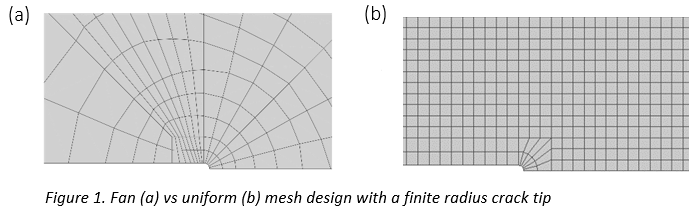


# Mesh development

This section takes the user through the steps taken to create the specimen mesh. If you would like to create a mesh directly, please go to the next section.

The schematic below shows the parameters required to define the mesh:

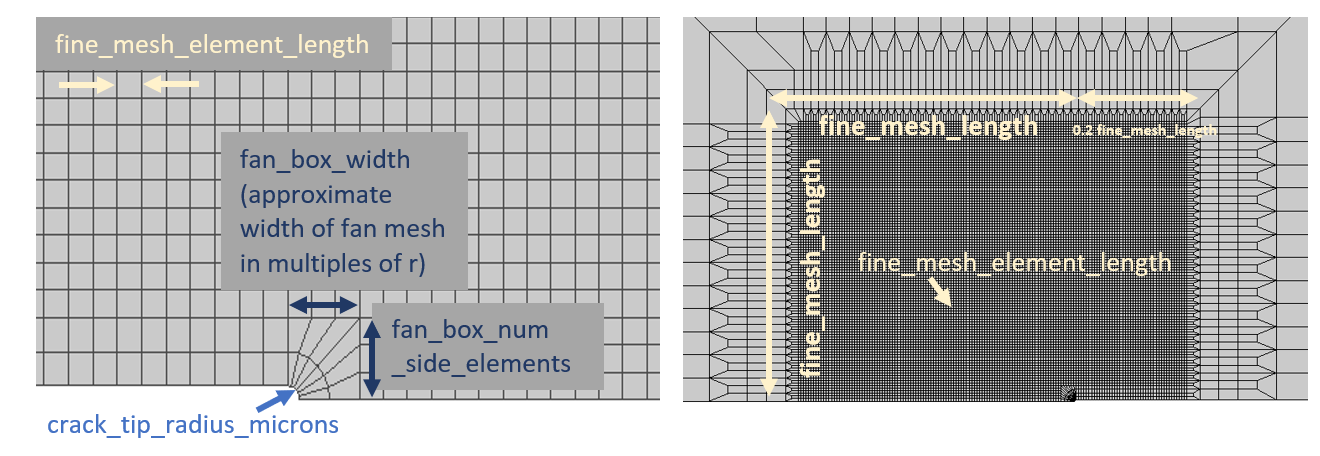

## Mesh definition

In [43]:
# USER INPUT
################################################
# FAN MESH 

# crack tip radius in micrometers, r
crack_tip_radius_microns = 10

# approximate width of fan mesh in multiples of r
fan_box_width = 5

# number of elements to split half of the crack tip curvature
fan_box_num_side_elements = 3

################################################
# FINE MESH
# fine mesh element side
fine_mesh_element_length = 0.02 #0.02

# side of square element in the fine mesh region
# Guidance based on temperature:
# 154: 0.6; 91: 2.2; 60: 3.2; 40: 3.4
fine_mesh_length = 0.2
################################################

## Fan (quarter-donut) mesh

In [44]:
donut_mesh = mesh.make_donut_mesh(crack_tip_radius_microns, fine_mesh_element_length, fan_box_num_side_elements, 
                          fan_box_width)

plot_x = [donut_mesh['nodes_flattened'][:, 0], donut_mesh['cell_centres_flattened'][:,0]]
plot_y = [donut_mesh['nodes_flattened'][:, 1], donut_mesh['cell_centres_flattened'][:,1]]

plot.plot_nodes(plot_x, plot_y, indices=[donut_mesh['node_labels_flattened'], donut_mesh['cell_labels_flattened']],
           dticks=[0.01, 0.01], figsize=[400, 400],)

rn:  7


FigureWidget({
    'data': [{'marker': {'size': 5},
              'mode': 'markers+text',
              'name'…

## Refined mesh

In [45]:
refined_mesh_definition = mesh.make_fine_plus_donut_mesh(crack_tip_radius_microns, fine_mesh_length,
                                            fine_mesh_element_length, fan_box_num_side_elements,
                                            fan_box_width, ret_crack_definition=True,
                                           size_behind_crack=0.2)

# NEXT: GO TO GEOMETRY OF SPECIMEN!!!

ref_mesh_nodes_all = refined_mesh_definition['node_coordinates']
ref_mesh_labs_all = refined_mesh_definition['node_labels']
ref_mesh_cells_all = refined_mesh_definition['element_nodes']
ref_mesh_cell_centres_all = refined_mesh_definition['element_centre_coordinates']
ref_mesh_cell_labs_all = refined_mesh_definition['element_labels']
crack_nodes = refined_mesh_definition['crack_definition']



rn:  7


In [46]:
# plot
plot_x = []
plot_y = []
for im, m in enumerate(ref_mesh_nodes_all):
#     if im == 0:
        plot_x.append(
        m[:,0],
        )
        plot_y.append(
        m[:,1],
        )
        
for im, m in enumerate(ref_mesh_cell_centres_all):
#     if im == 0:
        plot_x.append(
        m[:,0],
        )
        plot_y.append(
        m[:,1],
        )

plot.plot_nodes(plot_x, plot_y,  figsize=[600, 500],
           indices=ref_mesh_labs_all+ ref_mesh_cell_labs_all,
#            dticks=[0.01, 0.01]
          )

FigureWidget({
    'data': [{'marker': {'size': 5},
              'mode': 'markers+text',
              'name'…

## Expand mesh

# Create specimen model

## Mesh definition input

In [50]:
# USER INPUT
################################################
# FAN MESH 

# crack tip radius in micrometers, r
crack_tip_radius_microns = 10

# approximate width of fan mesh in multiples of r
fan_box_width = 5

# number of elements to split half of the crack tip curvature
fan_box_num_side_elements = 3

################################################
# FINE MESH
# fine mesh element side
fine_mesh_element_length = 0.02 #0.02

# side of square element in the fine mesh region
# Guidance based on temperature:
# 154: 0.6; 91: 2.2; 60: 3.2; 40: 3.4
fine_mesh_length = 0.2
################################################
# GLOBAL
dimension = '3D' # 3D | 2D

## global 3D
number_layers = 10
element_thickness = 'uniform' # uniform | variable 

## Geometry definition input
Define the parameters of the specimen geometry here. The allowed values are specified in a comment separated by a `|`.

In [51]:
# USER INPUT
size_type = 'ct-1t' # 'ct-1t' | 'senb-0.5' | 'senb-0.2'
fraction = 'quarter'  # quarter | half | full


## Create mesh

In [63]:
mesh_definition = {
    'crack_tip_radius_microns': crack_tip_radius_microns,
    'fine_mesh_length': fine_mesh_length,
    'fine_mesh_element_length': fine_mesh_element_length,
    'fan_box_num_side_elements': fan_box_num_side_elements,
    'fan_box_width': fan_box_width,
    'number_layers': number_layers,
    'element_thickness': element_thickness,
}

In [71]:
print(mesh.compact_tension_specimen_mesh(mesh_definition, dimension, size_type, fraction))

{'node_coordinates': array([[-2.58000000e+00,  1.00000000e-02,  0.00000000e+00],
       [-2.58000000e+00,  9.80000000e-01,  0.00000000e+00],
       [-2.58000000e+00,  2.70000000e+00,  0.00000000e+00],
       ...,
       [ 3.02882143e+01,  3.00000000e+01,  1.25000000e+01],
       [ 3.13100000e+01,  3.00000000e+01,  1.25000000e+01],
       [-1.87500000e+01,  1.87500000e+01,  1.25000000e+01]]), 'node_labels': array([  199,   200,   201, ..., 21638, 21639, 21640]), 'element_nodes': array([[    5,     4,     1, ...,  2187,  2188,  2202],
       [    6,     5,     2, ...,  2201,  2202,  2217],
       [    8,     7,     4, ...,  2185,  2187,  2201],
       ...,
       [19684, 19684, 19339, ..., 21640, 21295, 21294],
       [19684, 19684, 19280, ..., 21640, 21236, 21295],
       [19684, 19684, 19227, ..., 21640, 21183, 21236]]), 'element_labels': array([    1,     2,     3, ..., 18650, 18651, 18652]), 'elsets': {'specimen': array([    1,     2,     3, ..., 18639, 18640, 18641]), 'ridge': array